# Augmentations and Gradcam - Assignment 10
> Nikhil Shrimali

## Albumentations
In this Assignment, I have applied Albumentations blindly on the dataset, but when I observed the data, many labels were lost due to that. Target of augmentations should be to enhance the dataset and to train the model for those scenarios that can happen in real world. Hence changes the augmentations. Images can be seen in the code below.


## Gradcam
For this submission, I have identified the images that were wrongly classified and try to find out why this was the case. Images can be seen in the code below for misclassified and correctly classified dat


## Learning Rates

The learning rate is identified using LR finder approach, this has been integrated in Shrinkai library, the calculation has been done on local machine and hence selected best LR. Here the calculation is only for illustrative purposes.

> Learning Rate curve

![LinearLR](./assets/linear_LR.png)


In [12]:
# Cloning shrinkai
!git clone https://github.com/nikshrimali/shrinkai

fatal: destination path 'shrinkai' already exists and is not an empty directory.


In [13]:

!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install torch_lr_finder

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-eb7o0kuv
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-eb7o0kuv
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=69177 sha256=392d2347a21f43b4992a921dd0bf4278b8e647a77ffc0fd7333e76e433c5140b
  Stored in directory: /tmp/pip-ephem-wheel-cache-nbq0mgls/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: albumentations 0.4.6
    Uninstalling albumentations-0.4.6:
      Successfully uninstalled albumentations-0.4.6


In [14]:
from shrinkai.utils.run import *

In [15]:

%%writefile assignment10.yml
name: AdvLR
save_dir: saved/
seed: 1
target_device: 0

model:
    type: ResNet18
    args: {}

modelpath:
    type: PathModel
    args: savedmodel.h5    
      

train_data_loader:
    type: TrainDataLoader
    args:
        batch_size: 128
        num_workers: 0
        shuffle: True

test_data_loader:
    type: TestDataLoader
    args:
        batch_size: 128
        num_workers: 0
        shuffle: False

criterion: cross_entropy_loss

lrmod:
    type: ReduceLROnPlateau
    args:
        mode: 'min'
        factor: 0.1
        patience: 2
        threshold: 0.001
        threshold_mode: 'rel'
        cooldown: 0
        min_lr: 0
        verbose: True
    

optimizer:
    type: SGD
    args:
        lr: 0.00144
        momentum: 0.95
        weight_decay: 0.0005

range_test:
    type: lr_finder
    args:
        start_lr: 0.00001
        end_lr: 1
        num_iter: 1564
        step_mode: 'exp'
        

training:
    epochs: 50

Overwriting assignment10.yml


In [16]:
config = load_config('assignment10.yml')

In [17]:
config['lrmod']['args']

{'cooldown': 0,
 'factor': 0.1,
 'min_lr': 0,
 'mode': 'min',
 'patience': 2,
 'threshold': 0.001,
 'threshold_mode': 'rel',
 'verbose': True}

Files already downloaded and verified
Files already downloaded and verified


Loss=2.482673168182373 Batch_id=0 Accuracy=7.81:   0%|          | 1/391 [00:00<01:03,  6.15it/s]

Starting Training for 50 Epochs
EPOCHS : 0


Loss=1.6020272970199585 Batch_id=390 Accuracy=34.04: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
Loss=1.5734186172485352 Batch_id=0 Accuracy=39.84:   0%|          | 1/391 [00:00<01:06,  5.86it/s]


Test set: Average loss: 1.3213, Accuracy: 5197/10000 (51.97%)

EPOCHS : 1


Loss=1.3675720691680908 Batch_id=390 Accuracy=48.09: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0660, Accuracy: 6074/10000 (60.74%)

EPOCHS : 2


Loss=1.1966911554336548 Batch_id=390 Accuracy=55.29: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
Loss=1.1856495141983032 Batch_id=0 Accuracy=58.59:   0%|          | 1/391 [00:00<01:08,  5.66it/s]


Test set: Average loss: 0.8763, Accuracy: 6964/10000 (69.64%)

EPOCHS : 3


Loss=1.192895770072937 Batch_id=390 Accuracy=59.85: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]
Loss=1.1887757778167725 Batch_id=0 Accuracy=57.81:   0%|          | 1/391 [00:00<01:03,  6.14it/s]


Test set: Average loss: 0.8179, Accuracy: 7176/10000 (71.76%)

EPOCHS : 4


Loss=1.1309282779693604 Batch_id=390 Accuracy=62.91: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
Loss=1.1056207418441772 Batch_id=0 Accuracy=60.16:   0%|          | 1/391 [00:00<01:05,  5.91it/s]


Test set: Average loss: 0.8177, Accuracy: 7230/10000 (72.30%)

EPOCHS : 5


Loss=1.008667230606079 Batch_id=390 Accuracy=64.96: 100%|██████████| 391/391 [01:02<00:00,  6.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6966, Accuracy: 7588/10000 (75.88%)

EPOCHS : 6


Loss=0.8388756513595581 Batch_id=390 Accuracy=67.26: 100%|██████████| 391/391 [01:02<00:00,  6.26it/s]
Loss=0.8291009068489075 Batch_id=0 Accuracy=72.66:   0%|          | 1/391 [00:00<01:05,  6.00it/s]


Test set: Average loss: 0.6543, Accuracy: 7783/10000 (77.83%)

EPOCHS : 7


Loss=0.9121454358100891 Batch_id=390 Accuracy=68.71: 100%|██████████| 391/391 [01:01<00:00,  6.31it/s]
Loss=0.9737691879272461 Batch_id=0 Accuracy=67.97:   0%|          | 1/391 [00:00<00:59,  6.59it/s]


Test set: Average loss: 0.5620, Accuracy: 8112/10000 (81.12%)

EPOCHS : 8


Loss=0.8027578592300415 Batch_id=390 Accuracy=70.30: 100%|██████████| 391/391 [01:01<00:00,  6.32it/s]
Loss=0.7817373871803284 Batch_id=0 Accuracy=67.97:   0%|          | 1/391 [00:00<01:04,  6.04it/s]


Test set: Average loss: 0.5446, Accuracy: 8124/10000 (81.24%)

EPOCHS : 9


Loss=0.823165774345398 Batch_id=390 Accuracy=71.09: 100%|██████████| 391/391 [01:01<00:00,  6.32it/s]
Loss=0.7600436806678772 Batch_id=0 Accuracy=71.88:   0%|          | 1/391 [00:00<01:00,  6.42it/s]


Test set: Average loss: 0.5896, Accuracy: 8047/10000 (80.47%)

EPOCHS : 10


Loss=0.6687547564506531 Batch_id=390 Accuracy=72.32: 100%|██████████| 391/391 [01:01<00:00,  6.32it/s]
Loss=0.6953790187835693 Batch_id=0 Accuracy=75.00:   0%|          | 1/391 [00:00<00:57,  6.74it/s]


Test set: Average loss: 0.6039, Accuracy: 7992/10000 (79.92%)

EPOCHS : 11


Loss=0.7805672883987427 Batch_id=390 Accuracy=73.44: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
Loss=0.8084056377410889 Batch_id=0 Accuracy=69.53:   0%|          | 1/391 [00:00<00:59,  6.55it/s]


Test set: Average loss: 0.5198, Accuracy: 8315/10000 (83.15%)

EPOCHS : 12


Loss=0.8557478785514832 Batch_id=390 Accuracy=74.57: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]
Loss=0.6516346335411072 Batch_id=0 Accuracy=71.88:   0%|          | 1/391 [00:00<01:00,  6.43it/s]


Test set: Average loss: 0.6259, Accuracy: 8006/10000 (80.06%)

EPOCHS : 13


Loss=0.7254803776741028 Batch_id=390 Accuracy=75.29: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]
Loss=0.798845648765564 Batch_id=0 Accuracy=73.44:   0%|          | 1/391 [00:00<01:04,  6.04it/s]


Test set: Average loss: 0.4560, Accuracy: 8445/10000 (84.45%)

EPOCHS : 14


Loss=0.6785906553268433 Batch_id=390 Accuracy=75.58: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
Loss=0.5839812159538269 Batch_id=0 Accuracy=75.78:   0%|          | 1/391 [00:00<00:58,  6.64it/s]


Test set: Average loss: 0.4890, Accuracy: 8380/10000 (83.80%)

EPOCHS : 15


Loss=0.860803484916687 Batch_id=390 Accuracy=76.37: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
Loss=0.6073950529098511 Batch_id=0 Accuracy=78.91:   0%|          | 1/391 [00:00<01:01,  6.38it/s]


Test set: Average loss: 0.4507, Accuracy: 8486/10000 (84.86%)

EPOCHS : 16


Loss=0.592621922492981 Batch_id=390 Accuracy=76.78: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]
Loss=0.6016907691955566 Batch_id=0 Accuracy=77.34:   0%|          | 1/391 [00:00<01:04,  6.06it/s]


Test set: Average loss: 0.5502, Accuracy: 8232/10000 (82.32%)

EPOCHS : 17


Loss=0.6828408241271973 Batch_id=390 Accuracy=77.24: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]
Loss=0.4378013014793396 Batch_id=0 Accuracy=82.03:   0%|          | 1/391 [00:00<00:58,  6.64it/s]


Test set: Average loss: 0.4631, Accuracy: 8520/10000 (85.20%)

EPOCHS : 18


Loss=0.5956049561500549 Batch_id=390 Accuracy=77.92: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]
Loss=0.6774789094924927 Batch_id=0 Accuracy=75.00:   0%|          | 1/391 [00:00<00:58,  6.63it/s]


Test set: Average loss: 0.4387, Accuracy: 8514/10000 (85.14%)

EPOCHS : 19


Loss=0.533641517162323 Batch_id=390 Accuracy=78.33: 100%|██████████| 391/391 [01:00<00:00,  6.42it/s]
Loss=0.5956204533576965 Batch_id=0 Accuracy=79.69:   0%|          | 1/391 [00:00<01:00,  6.43it/s]


Test set: Average loss: 0.4180, Accuracy: 8655/10000 (86.55%)

EPOCHS : 20


Loss=0.5518078804016113 Batch_id=390 Accuracy=79.17: 100%|██████████| 391/391 [01:00<00:00,  6.42it/s]
Loss=0.6675863265991211 Batch_id=0 Accuracy=75.00:   0%|          | 1/391 [00:00<01:03,  6.16it/s]


Test set: Average loss: 0.4843, Accuracy: 8450/10000 (84.50%)

EPOCHS : 21


Loss=0.5363031029701233 Batch_id=390 Accuracy=78.88: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
Loss=0.5476027727127075 Batch_id=0 Accuracy=78.12:   0%|          | 1/391 [00:00<01:01,  6.33it/s]


Test set: Average loss: 0.4143, Accuracy: 8671/10000 (86.71%)

EPOCHS : 22


Loss=0.3912582993507385 Batch_id=390 Accuracy=79.44: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
Loss=0.45061060786247253 Batch_id=0 Accuracy=82.81:   0%|          | 1/391 [00:00<01:00,  6.49it/s]


Test set: Average loss: 0.4226, Accuracy: 8645/10000 (86.45%)

EPOCHS : 23


Loss=0.6574759483337402 Batch_id=390 Accuracy=79.97: 100%|██████████| 391/391 [01:00<00:00,  6.41it/s]
Loss=0.4435240924358368 Batch_id=0 Accuracy=84.38:   0%|          | 1/391 [00:00<01:07,  5.74it/s]


Test set: Average loss: 0.4538, Accuracy: 8583/10000 (85.83%)

EPOCHS : 24


Loss=0.6362282037734985 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]
Loss=0.55039381980896 Batch_id=0 Accuracy=78.12:   0%|          | 1/391 [00:00<01:04,  6.04it/s]


Test set: Average loss: 0.4538, Accuracy: 8554/10000 (85.54%)

Epoch    25: reducing learning rate of group 0 to 1.4400e-04.
EPOCHS : 25


Loss=0.49376335740089417 Batch_id=390 Accuracy=82.99: 100%|██████████| 391/391 [01:00<00:00,  6.43it/s]
Loss=0.44319286942481995 Batch_id=0 Accuracy=84.38:   0%|          | 1/391 [00:00<01:00,  6.48it/s]


Test set: Average loss: 0.3377, Accuracy: 8919/10000 (89.19%)

EPOCHS : 26


Loss=0.36373233795166016 Batch_id=390 Accuracy=83.53: 100%|██████████| 391/391 [01:00<00:00,  6.42it/s]
Loss=0.5194668769836426 Batch_id=0 Accuracy=81.25:   0%|          | 1/391 [00:00<01:03,  6.17it/s]


Test set: Average loss: 0.3271, Accuracy: 8950/10000 (89.50%)

EPOCHS : 27


Loss=0.4894539713859558 Batch_id=390 Accuracy=83.56: 100%|██████████| 391/391 [01:01<00:00,  6.41it/s]
Loss=0.3498402535915375 Batch_id=0 Accuracy=85.94:   0%|          | 1/391 [00:00<01:00,  6.48it/s]


Test set: Average loss: 0.3273, Accuracy: 8938/10000 (89.38%)

EPOCHS : 28


Loss=0.4588192105293274 Batch_id=390 Accuracy=84.09: 100%|██████████| 391/391 [01:00<00:00,  6.43it/s]
Loss=0.43184563517570496 Batch_id=0 Accuracy=85.94:   0%|          | 1/391 [00:00<01:00,  6.44it/s]


Test set: Average loss: 0.3263, Accuracy: 8953/10000 (89.53%)

EPOCHS : 29


Loss=0.33913975954055786 Batch_id=390 Accuracy=84.24: 100%|██████████| 391/391 [01:00<00:00,  6.44it/s]
Loss=0.386095255613327 Batch_id=0 Accuracy=89.84:   0%|          | 1/391 [00:00<00:58,  6.72it/s]


Test set: Average loss: 0.3236, Accuracy: 8945/10000 (89.45%)

EPOCHS : 30


Loss=0.4845217764377594 Batch_id=390 Accuracy=84.60: 100%|██████████| 391/391 [00:59<00:00,  6.53it/s]
Loss=0.3762910068035126 Batch_id=0 Accuracy=86.72:   0%|          | 1/391 [00:00<01:02,  6.27it/s]


Test set: Average loss: 0.3230, Accuracy: 8956/10000 (89.56%)

EPOCHS : 31


Loss=0.6501458883285522 Batch_id=390 Accuracy=84.28: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]
Loss=0.5924046039581299 Batch_id=0 Accuracy=80.47:   0%|          | 1/391 [00:00<01:06,  5.83it/s]


Test set: Average loss: 0.3229, Accuracy: 8975/10000 (89.75%)

EPOCHS : 32


Loss=0.40622782707214355 Batch_id=390 Accuracy=84.43: 100%|██████████| 391/391 [01:02<00:00,  6.30it/s]
Loss=0.48226597905158997 Batch_id=0 Accuracy=84.38:   0%|          | 1/391 [00:00<01:03,  6.14it/s]


Test set: Average loss: 0.3206, Accuracy: 8987/10000 (89.87%)

EPOCHS : 33


Loss=0.33088332414627075 Batch_id=390 Accuracy=84.58: 100%|██████████| 391/391 [01:02<00:00,  6.24it/s]
Loss=0.43128275871276855 Batch_id=0 Accuracy=85.94:   0%|          | 1/391 [00:00<01:02,  6.28it/s]


Test set: Average loss: 0.3232, Accuracy: 8974/10000 (89.74%)

EPOCHS : 34


Loss=0.5359102487564087 Batch_id=390 Accuracy=84.51: 100%|██████████| 391/391 [01:02<00:00,  6.26it/s]
Loss=0.3750283122062683 Batch_id=0 Accuracy=86.72:   0%|          | 1/391 [00:00<01:02,  6.26it/s]


Test set: Average loss: 0.3220, Accuracy: 8972/10000 (89.72%)

EPOCHS : 35


Loss=0.6590700149536133 Batch_id=390 Accuracy=85.11: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
Loss=0.356031209230423 Batch_id=0 Accuracy=85.16:   0%|          | 1/391 [00:00<01:03,  6.16it/s]


Test set: Average loss: 0.3198, Accuracy: 8983/10000 (89.83%)

EPOCHS : 36


Loss=0.4032478928565979 Batch_id=390 Accuracy=85.07: 100%|██████████| 391/391 [01:03<00:00,  6.16it/s]
Loss=0.45079752802848816 Batch_id=0 Accuracy=85.16:   0%|          | 1/391 [00:00<01:08,  5.71it/s]


Test set: Average loss: 0.3128, Accuracy: 9006/10000 (90.06%)

EPOCHS : 37


Loss=0.37282106280326843 Batch_id=390 Accuracy=84.83: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]
Loss=0.3936019539833069 Batch_id=0 Accuracy=87.50:   0%|          | 1/391 [00:00<01:06,  5.89it/s]


Test set: Average loss: 0.3161, Accuracy: 9001/10000 (90.01%)

EPOCHS : 38


Loss=0.42874574661254883 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]
Loss=0.4272680878639221 Batch_id=0 Accuracy=85.94:   0%|          | 1/391 [00:00<01:00,  6.39it/s]


Test set: Average loss: 0.3167, Accuracy: 8992/10000 (89.92%)

EPOCHS : 39


Loss=0.29904502630233765 Batch_id=390 Accuracy=85.06: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]
Loss=0.34582483768463135 Batch_id=0 Accuracy=87.50:   0%|          | 1/391 [00:00<01:01,  6.31it/s]


Test set: Average loss: 0.3227, Accuracy: 8976/10000 (89.76%)

Epoch    40: reducing learning rate of group 0 to 1.4400e-05.
EPOCHS : 40


Loss=0.37698107957839966 Batch_id=390 Accuracy=85.31: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]
Loss=0.3624062240123749 Batch_id=0 Accuracy=87.50:   0%|          | 1/391 [00:00<01:06,  5.89it/s]


Test set: Average loss: 0.3152, Accuracy: 9015/10000 (90.15%)

EPOCHS : 41


Loss=0.37386277318000793 Batch_id=390 Accuracy=85.59: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]
Loss=0.45704978704452515 Batch_id=0 Accuracy=81.25:   0%|          | 1/391 [00:00<01:06,  5.86it/s]


Test set: Average loss: 0.3117, Accuracy: 9018/10000 (90.18%)

EPOCHS : 42


Loss=0.4634368419647217 Batch_id=390 Accuracy=85.37: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]
Loss=0.3197965919971466 Batch_id=0 Accuracy=89.84:   0%|          | 1/391 [00:00<01:01,  6.39it/s]


Test set: Average loss: 0.3142, Accuracy: 9012/10000 (90.12%)

EPOCHS : 43


Loss=0.7036782503128052 Batch_id=390 Accuracy=85.36: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]
Loss=0.432133287191391 Batch_id=0 Accuracy=84.38:   0%|          | 1/391 [00:00<01:06,  5.84it/s]


Test set: Average loss: 0.3152, Accuracy: 9008/10000 (90.08%)

EPOCHS : 44


Loss=0.44186362624168396 Batch_id=390 Accuracy=85.53: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]
Loss=0.4407963156700134 Batch_id=0 Accuracy=83.59:   0%|          | 1/391 [00:00<01:04,  6.08it/s]


Test set: Average loss: 0.3127, Accuracy: 9032/10000 (90.32%)

Epoch    45: reducing learning rate of group 0 to 1.4400e-06.
EPOCHS : 45


Loss=0.4018406271934509 Batch_id=390 Accuracy=85.33: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]
Loss=0.4150068461894989 Batch_id=0 Accuracy=85.16:   0%|          | 1/391 [00:00<01:07,  5.75it/s]


Test set: Average loss: 0.3102, Accuracy: 9024/10000 (90.24%)

EPOCHS : 46


Loss=0.4623967111110687 Batch_id=390 Accuracy=85.55: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]
Loss=0.5022408962249756 Batch_id=0 Accuracy=82.81:   0%|          | 1/391 [00:00<01:11,  5.47it/s]


Test set: Average loss: 0.3097, Accuracy: 9022/10000 (90.22%)

EPOCHS : 47


Loss=0.5284935235977173 Batch_id=390 Accuracy=85.45: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
Loss=0.42852967977523804 Batch_id=0 Accuracy=85.16:   0%|          | 1/391 [00:00<01:04,  6.05it/s]


Test set: Average loss: 0.3089, Accuracy: 9008/10000 (90.08%)

EPOCHS : 48


Loss=0.3363160490989685 Batch_id=390 Accuracy=85.20: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
Loss=0.39873406291007996 Batch_id=0 Accuracy=89.06:   0%|          | 1/391 [00:00<01:07,  5.82it/s]


Test set: Average loss: 0.3121, Accuracy: 9020/10000 (90.20%)

EPOCHS : 49


Loss=0.44619688391685486 Batch_id=390 Accuracy=85.41: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]



Test set: Average loss: 0.3133, Accuracy: 9022/10000 (90.22%)



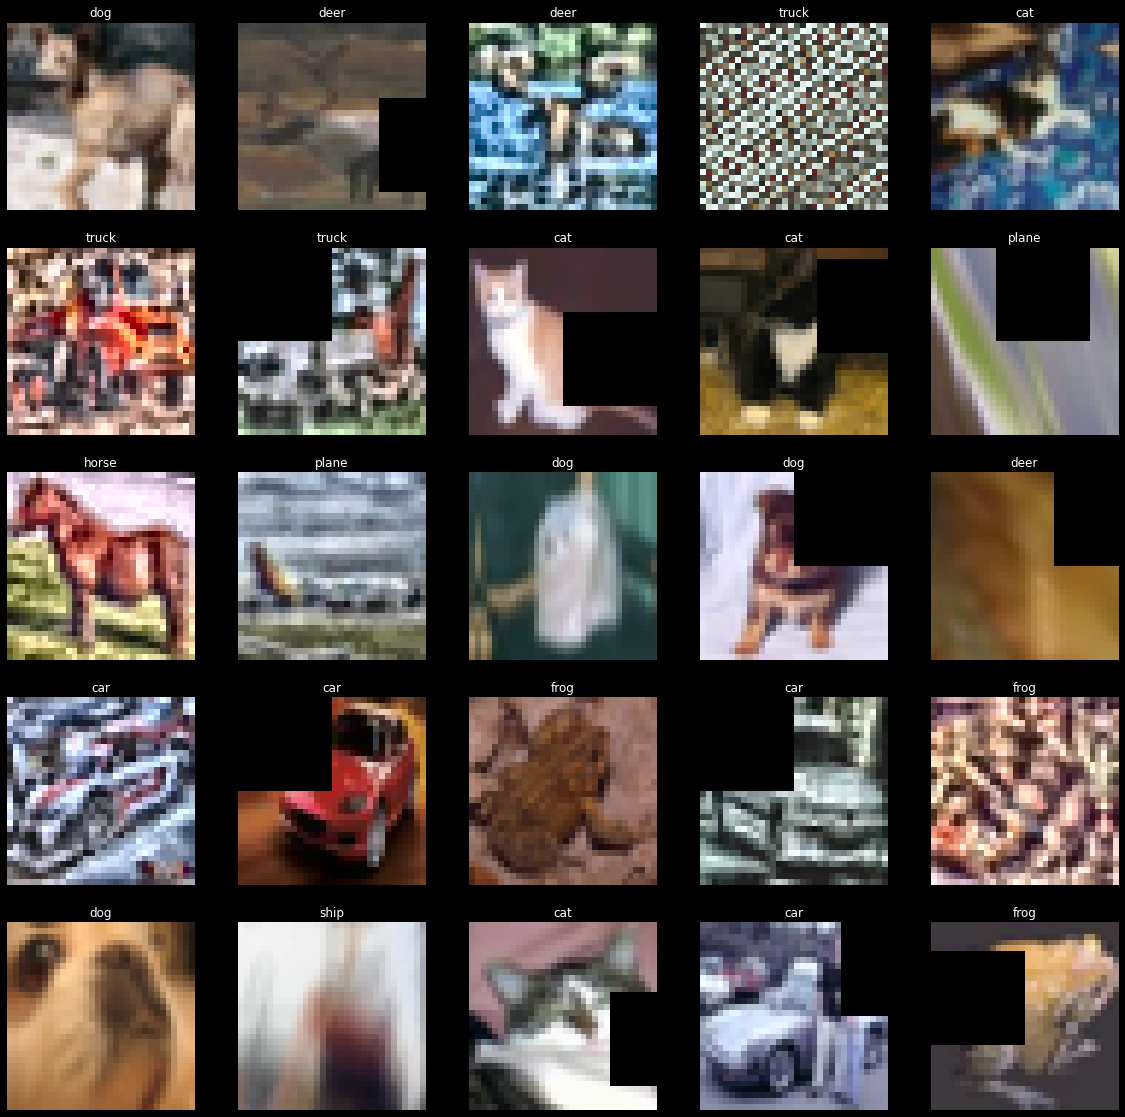

In [18]:
shrink = Shrink(config)
shrink.seed_everything(1)
trainloader, testloader = (shrink.load_data())
shrink.show_data()
shrink.get_model()

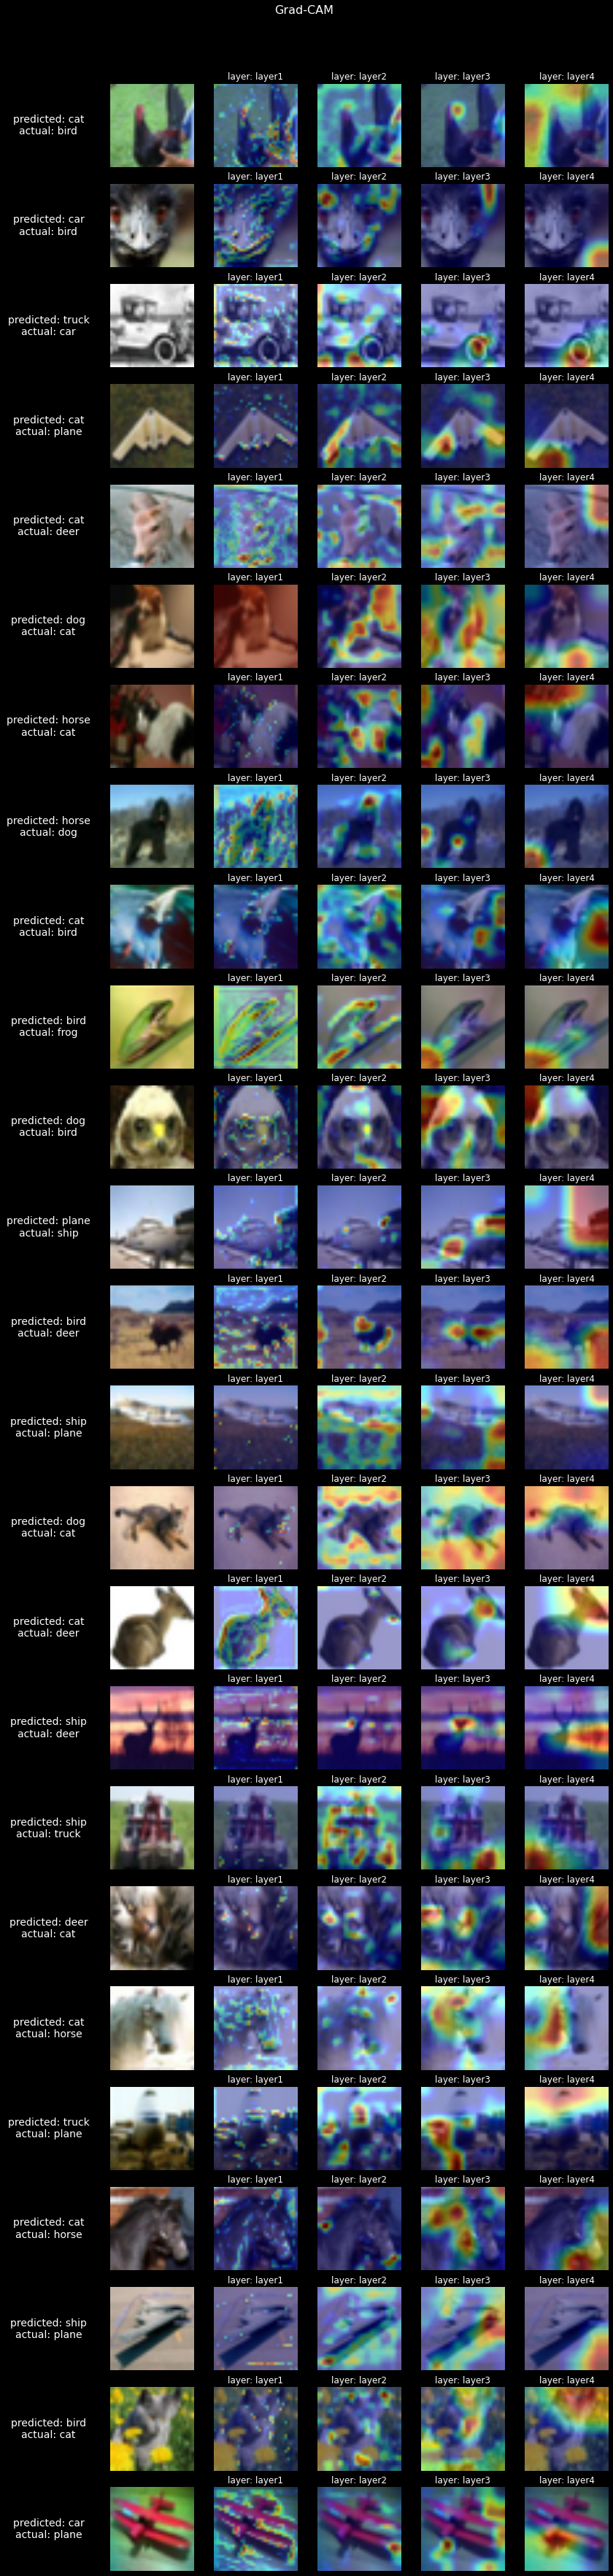

<Figure size 432x288 with 0 Axes>

In [19]:
# Incorrect Classified
shrink.get_gradoutput(misclassified=True)

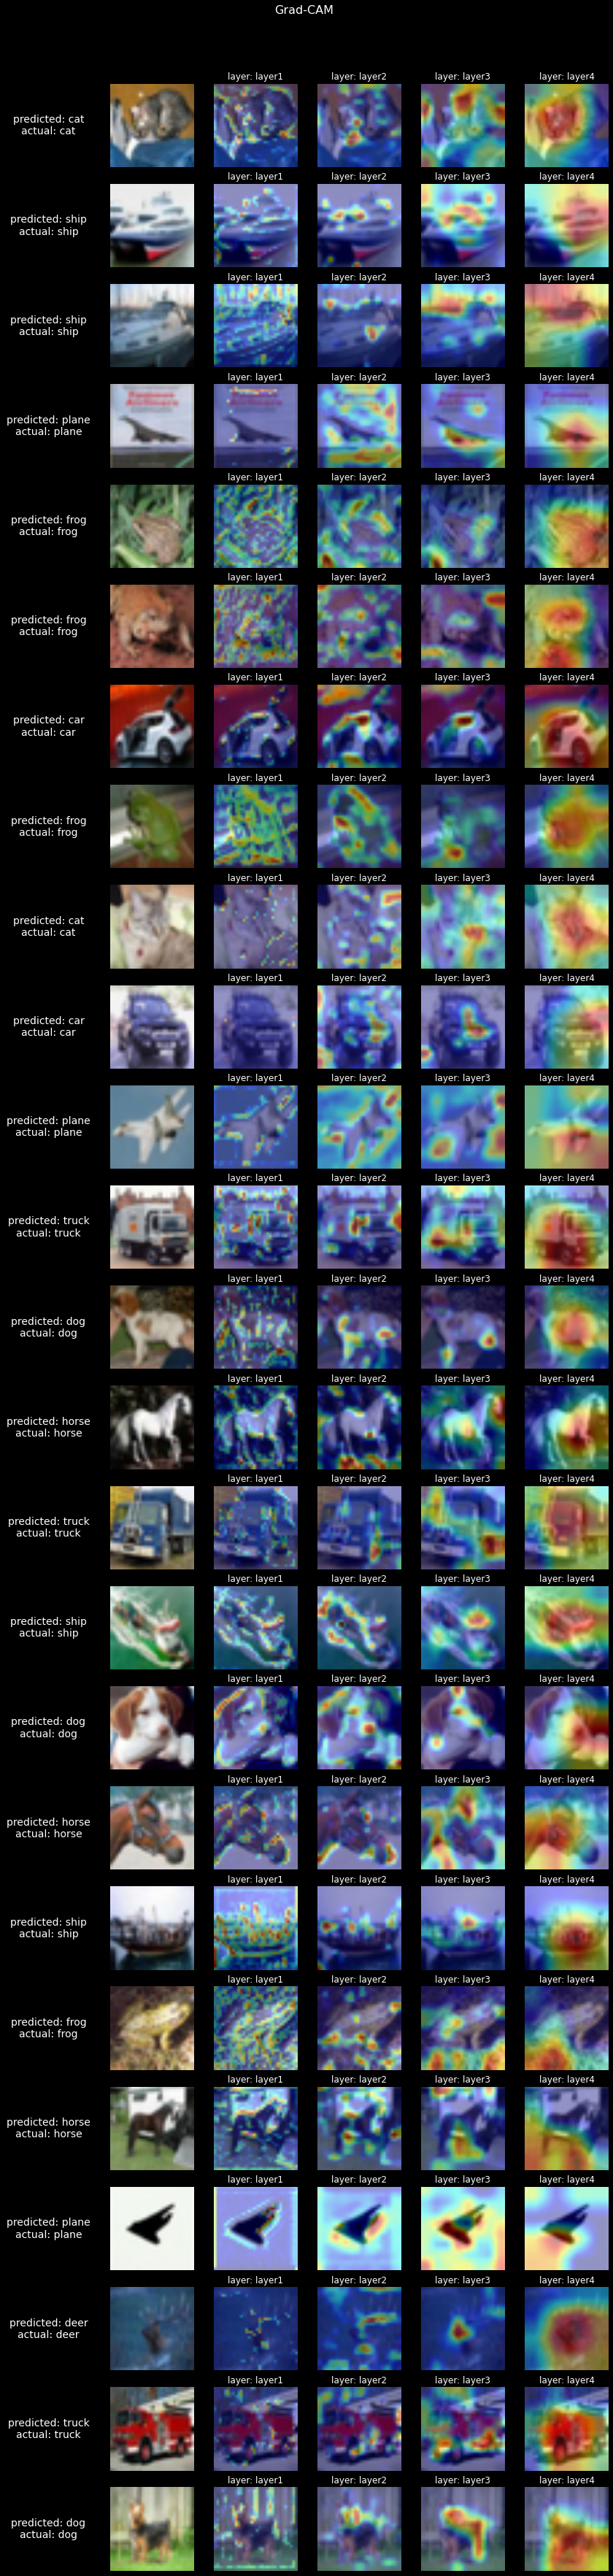

<Figure size 432x288 with 0 Axes>

In [20]:
# Correct Classified
shrink.get_gradoutput(misclassified=False)

# Learning Rate Calculation


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.14E-01


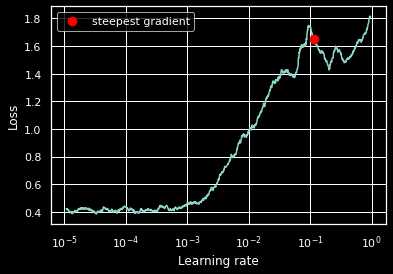

In [23]:
lr_finder = shrink.findbestlr()

In [24]:
def take_lr(x):
    return x[0]

tup = zip(lr_finder.history['loss'], lr_finder.history['lr'])
sorted_tup = (sorted(tup,key=take_lr,  reverse=False))

In [25]:
sorted_tup[0]

(0.38562661201867965, 3.322256359254832e-05)